Aim
===

To build a spatio-temporal simulator that can predict the spread of
Covid-19 in Kerala under different mitigation strategies. We hope that
this will be useful for experts in community health to corroborate their
intuition against a mathematical prediction.

Key features
============

1.  The resolution of the model is at the smallest local self-governing
    division (LSGD) in Kerala. That is, grama panchayat, municipality or
    municipal corporation.

2.  The predictions are based on available information about the
    characteristics of the disease, the geographic and demographic data
    of Kerala and the statistics of reported cases so far.

3.  The time evolution of the disease in each LSGD is modelled using a
    deterministic [SEIR
    model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model)
    fine-tuned for Covid-19.

4.  The mixing of population between panchayats is based on the
    [*gravity model* for human
    mobility](https://en.wikipedia.org/wiki/Gravity_model_of_migration)

5.  Spatio-temporal effect of various lockdown strategies can be tried
    out by the user. Some examples of lockdown strategies include

    1.  Lockdown a panchayat for $d$ days if there are more than $c$
        active cases in that panchayat.  
    2.  Lockdown a panchayat and its neighbouring panchayats for $d$
        days if there are more than $c$ active cases in that panchayat.

6.  A lockdown strategy will be declared as *safe* if the demand for
    number of cases needing hospitalisation is within the capacity of
    the corresponding LSGD at every point in time. Other strategies will
    be declared as *unsafe*. A quality parameter will be reported for
    each safe strategy tried. The quality parameter is equal to the
    average number of working days (non-lockdown days) per person for
    the next year.

7.  The system will automatically try out various lockdown strategies in
    the backend and provide a small set of safe strategies which acheive
    high values for the above quality parameter.

User interface
==============

1.  A web dashboard like
    [Covid19-Scenarios](https://covid19-scenarios.org/) with added
    map-based animations like
    [OurWoldInData](https://ourworldindata.org/grapher/total-covid-deaths-per-million)
    for projected data.

2.  The user can try out the effect of various spatio-temporal lockdown
    strategies like those available in
    [CovidMeasures](https://covid-measures.github.io/)

3.  A discussion forum (not sure if it is needed or not)

4.  A logging of crowd-sourced high quality strategies (again, not sure)

Time evolution (SEIR Model)
===========================

A person gets infected by SARS-CoV-2 (Covid-19) virus when she comes in
contact (either directly or via a shared surface) with an infectious
person. A fraction of such people will start showing symptoms within $2$
to $14$ days (average $5.2$ days) and the symptoms will typically last
for around $10$ days. This is called as the *health timeline* in the
figure below. But what matters more for modelling is the *infectivity
timeline*, which is the period during which an infected person is
infectious or contagious. This period is estimated to start typically
from about $1$ to $2$ days before the onset of symptoms and lasts
typically for about $7$ days. This period is marked as $I$ (Infectious)
in the infectivity timeline. The period before that, starting from the
day of contact is marked as $E$ (Exposed or Latent). This is when the
virus is multiplying in her body but is still not numerous enough to be
infectious. The period after $I$ is marked as $R$ (Removed). This is
when she is no longer infectious. She might still have symptoms at this
stage and will typically take another $8$ or more days to be cured. Note
that the word “typically” is intentionally overused in this paragraph.
All these timelines vary from person to person depending on their health
conditions and viral load transmitted at contact. The above numbers are
picked from the [MIDAS Online Portal for COVID-19 Modeling
Research](https://midasnetwork.us/covid-19/).

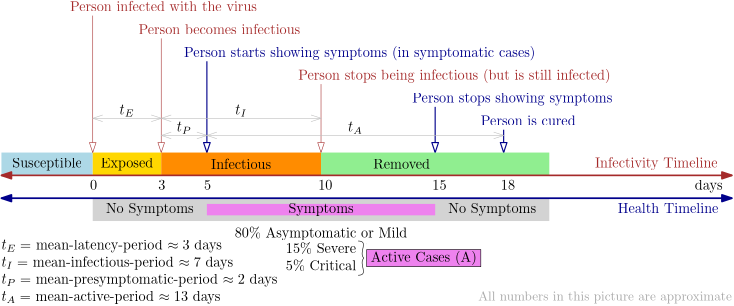

The SEIR model of disease spread is based on the infectivity timeline
above. It considers the total population $N$ in a region as being split
into four compartments based on their stage of infection. The number of
people in each compartment change with time but they always add to $N$.

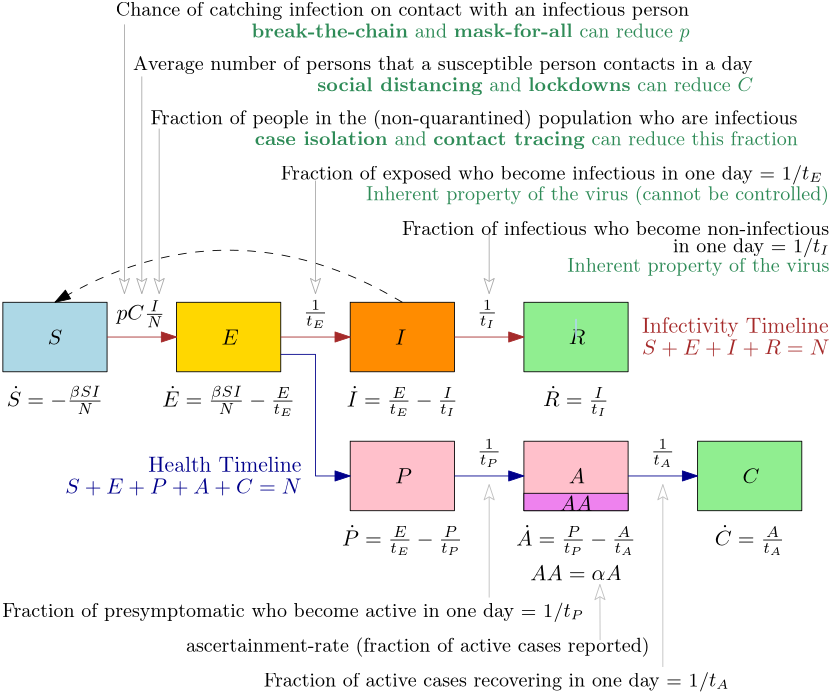

Temporal evolution equations
----------------------------

The daily increment to each compartment is given by the following
equations. $$
\begin{aligned}
\dot S   &= -\beta S \frac{I}{N} \\
\dot E   &= \beta S \frac{I}{N} - \frac{E}{t_E}\\
\dot I   &= \frac{E}{t_E} - \frac{I}{t_I}\\
\dot R   &= \frac{I}{t_I}\\
\dot P   &= \frac{E}{t_E} - \frac{P}{t_P}\\
\dot A   &= \frac{P}{t_P} - \frac{A}{t_A}\\
\dot C   &= \frac{A}{t_A}\\
\end{aligned}
$$

Finally, the number of active reported cases will be modelled as
$A_R = \alpha A$.

Here

-   $\beta = p c$, where

    -   $p$ is the probability that a susceptible person who contacts an
        infectious person catches the disease (not all contacts transmit
        the disease)

    -   $c$ is the expected number of people that a susceptible person
        contacts in a day. Going further we will have to model it as
        $c = c_h + c_w$, where $c_h$ and $c_w$ are the expected number
        of people that a susceptible person contacts at home and
        work/school respectively.

    -   $c \frac{I}{N}$ therefore, is the expected number of infectious
        people that a susceptible person contacts in a day.

    -   $p c \frac{I}{N}$ therefore, is the probability that that a
        susceptible person catches the disease in a day.

-   $t_E$, $t_I$, $t_P$ and $t_A$ are the mean time that a person spends
    in the respective compartments, before moving onto the next.

-   $\alpha$ is ascertainment rate, that is the fraction of infected
    people who test positive.

-   The time variable is hidden in the above equations for readability.
    $S$ should be read as $S(t)$ and $\dot S$ should be read as
    $S(t+1) - S(t)$, and so on.

### Current parameter choices

-   $p \approx 0.02$, this can reduce with the use of masks and regular
    cleansing.
-   $c_h \approx 5$
-   $c_w$ is typically 15 on a normal day
-   $t_E \approx 3$
-   $t_I \approx 7$
-   $t_P \approx 2$
-   $t_A \approx 13$
-   $\alpha \approx 1/100$

Spatial mixing
==============

We say that a person *travels* from region $R_i$ to region $R_j$, if she
lives in $R_i$ but goes daily to $R_j$ for work. We will assume that
there are $r$ regions in total. Let us denote by $T_{i,j}$, the number
of people travelling for work from region $R_i$ to region $R_j$ in a
day. How fast an epidemic spreads over various regions depends mainly on
these numbers. Unfortunately, we do not have actual estimates for these
numbers. Hence we use a commonly used mathematical model called the
*gravity model* to artificially estimate these numbers.

Travel matrix $T$ from Gravity model
------------------------------------

The gravity model needs three inputs, some of which we indirectly
modelled using the population statistics. We denote the population of
region $R_i$ with $N_i$.

1.  $T_i$, the number of people who travel out from region $R_i$ every
    day. We need this for for every LSGD in the state. In the absence of
    direct estimates, we assume $T_i$ indirectly from the 2011 census
    data as follows.

    Census 2011 contains a histogram of daily travel distances of
    non-agricultural workers at district level resolution. Since the
    histogram is coarse and there is no huge variation across districts,
    we estimate $T_i$ as $T_i = \mu N_i$, where

    -   $\mu = 0.09$ for regions with area less than $25$ square
        kilometers
    -   $\mu = 0.04$ for regions with area between $25$ and $100$ square
        kilometers
    -   $\mu = 0.02$ for regions with area more than $100$ square
        kilometers

    The values 9%, 4% and 2% used above are based, respectively, on the
    2011 census estimate of the percentage of population travelling more
    than $5$, $10$ and $20$ kilometers for work (Kerala overall
    statistics).

2.  $J_j$ is the number of non-agricultural job opportunities in $R_j$.
    We need this too for every LSGD. It will be great if one can find
    these numbers from a primary source. In the absence of such a
    source, we model it as $J_j = \zeta N_j$, where

    -   $\zeta = 0.1$ for grama panchayats,
    -   $\zeta = 0.2$ for municipalities and
    -   $\zeta = 0.3$ for corporations

    *Notes.* Only the relative magnitudes of the three zeta’s matter. We
    consider only non-agricultural jobs, since census data considers
    that agricultural sector jobs has very little contribution to
    long-distance (more than 5 km) daily commuting.

3.  $d_{i,j}$ is the travel distance between regions $R_i$ and $R_j$. We
    need this for every pair of LSGDs.

Using these three inputs, we model the number of people $T_{i,j}$
travelling for work from region $R_i$ to region $R_j$ in a day is as

$$
T_{i,j} = \alpha_i \frac {T_i J_j}{d_{i,j}^2}.
$$ where the normalisation factor $$
\alpha_i = \left(\sum_{k \neq i}(J_k/d_{i,k}^2)\right)^{-1}.
$$

We assume the dependence on the distance to be
$T_{i,j} \propto 1/d_{i,j}^2$. This dependence is usually calibrated
based on real data of job movement in a region. In the absence of such
data for Kerala, we are making an arbitrary choice here based on a
subjective validation of the results.

Putting it all together in one formula, we get

$$
T_{i,j} = T_i \frac{(J_j/d_{i,j}^2)}{\sum_{k \neq i}(J_k/d_{i,k}^2)},~ \forall j \neq i,
$$ and then compute $T_{i,i} = N_i - \sum_{k \neq i} T_{i,k}$.
Theoretically $T_{i,i}$ should be $N_i - T_i$, but it may have rounding
errors.

*Speedup notes.*

-   It is better to compute the $T_i$ and $J_i$ arrays first rather than
    computing it as $\mu N_i$ and $\zeta N_i$ inside the nested loops.

-   It might be fastest to compute $T_{i,j}$ values as a $r \times r$
    matrix in three stages.

    1.  Fill a matrix $A$ with $A[i,j] = J_j/d_{i,j}^2$ for $j \neq i$
        and $0$ for $j = i$.
    2.  Divide each row of $A$ by the sum of that row so that finally
        each row sums to $1$.
    3.  Multiply each row of $A$ with $T_i$ to get the $T_{i,j}$ matrix
        (except the diagonal entries)
    4.  Set the diagonal entries $T_{i,i}$ as $N_i$ minus the sum of
        $i$-th row of the $T_{i,j}$ matrix obtained in the previous
        step.

Normal Workplace Contact matrix $W_N$
-------------------------------------

The *Normal Workplace Contact Matrix* $W_N$ is an $r \times r$ matrix in
which the entry $W_N[i,j]$ is the expected number of people from region
$R_j$ that a susceptible person from region $R_i$ will contact at
workplace/school during a *normal day*. We will scale this matrix
appropriately for non-normal days, that is days in which any mitigation
strategy is active. We model $W_N$ as a function of the population
statistics and the travel matrix.

$$
W_N[i,j] = c_w \sum_{k=1}^{r} \frac{T_{i,k}}{N_i} \frac{T_{j,k}}{\sum_{l=1}^{r} T_{l,k}},
$$ where

-   $c_w$ is the expected number of people that a susceptible person
    contacts at work/school on a normal day,

-   $N_i$ is the population of region $R_i$, and

-   $T_{i,j}$ is the expected number of people travelling for work from
    region $R_i$ to region $R_j$ on a normal day.

*Justification.* If we consider a person picked uniformly at random from
region $R_i$, the term $T_{i,k} / N_i$ can be interpreted as the
probability that she goes for work in region $R_k$ and the term
$T_{j,k} / \sum_{l=1}^{r} T_{l,k}$ can be interpreted as the probability
that a person she contacts at workplace (while at work in region $R_k$)
has come to work there from region $R_j$. Notice that the total number
of people in region $R_k$ during the day is not $N_k$ but
$\sum_{l=1}^{r} T_{l,k}$. Since we have chosen $T_{k,k}$ as $N_k - T_k$,
this sum will automatically account for the people who live and work in
$R_k$.

Mitigated Workplace Contact Matrix $W_M$
----------------------------------------

The *mitigated workplace contact matrix* $W_M$ is a function of the
normal workplace contact matrix $W_N$ and the various mitigation
strategies like break-the-chain, lockdowns, hotspots etc that are active
in the state on a day. The entry $W_M[i,j]$ will represent the expected
number of people from region $R_j$ that a susceptible person from region
$R_i$ will contact at workplace/school during a day when all the active
mitigation strategies are in place.

This matrix will have to be recomputed whenever there is a change in
mitigation strategies. The reduction in workplace contact rate due to
each mitigation strategy is captured by an $r \times r$ mitigation
matrices $M$ as follows.

1.  Normal day
    -   The mitigation matrix $M_N$ is all $1$
    -   *Inputs* : None
2.  Break the Chain
    -   The mitigation matrix $M_{BC}$ is all $\epsilon_{BC}$ .
    -   *Inputs* : Date ranges
3.  Complete Lockdown
    -   The mitigation matrix $M_{LD}$ is all $\epsilon_{LD}$ .
4.  District Border Closure
    -   $M_{DB}[i,j] = 1$ if $R_i$ and $R_j$ are in the same district
    -   $M_{DB}[i,j] = \epsilon_{DB}$ if $R_i$ and $R_j$ are in
        different districts
    -   In a seven-region toy example with regions 1 and 2 in the first
        district, regions 3, 4 and 5 in the second district and regions
        6 and 7 in the third, the $M_{DB}$ matrix will look like $$
        \begin{bmatrix}
        1 & 1 & \epsilon_{DB} & \epsilon_{DB} & \epsilon_{DB}  & \epsilon_{DB} & \epsilon_{DB} \\
        1 & 1 & \epsilon_{DB} & \epsilon_{DB} & \epsilon_{DB}  & \epsilon_{DB} & \epsilon_{DB} \\
        \epsilon_{DB} & \epsilon_{DB} & 1 & 1 & 1  & \epsilon_{DB} & \epsilon_{DB} \\
        \epsilon_{DB} & \epsilon_{DB} & 1 & 1 & 1  & \epsilon_{DB} & \epsilon_{DB} \\
        \epsilon_{DB} & \epsilon_{DB} & 1 & 1 & 1  & \epsilon_{DB} & \epsilon_{DB} \\
        \epsilon_{DB} & \epsilon_{DB} & \epsilon_{DB} & \epsilon_{DB} & \epsilon_{DB} & 1 & 1 \\
        \epsilon_{DB} & \epsilon_{DB} & \epsilon_{DB} & \epsilon_{DB} & \epsilon_{DB} & 1 & 1 
        \end{bmatrix}
        $$
    -   *Inputs* : Date ranges
5.  Hotspots
    -   $M_{HS}[i,j] = \epsilon_{HS}$ if either $R_i$ or $R_j$ is a
        hotspot. Otherwise it is $1$.
    -   In the seven-region toy example with regions 2,3 and 7 declared
        as hotspots, $M_{HS}$ matrix will look like $$
        \begin{bmatrix}
        1 & \epsilon_{HS} & \epsilon_{HS} & 1 & 1 & 1 & \epsilon_{HS} \\
        \epsilon_{HS} & \epsilon_{HS}  & \epsilon_{HS} & \epsilon_{HS} & \epsilon_{HS}  & \epsilon_{HS} & \epsilon_{HS} \\
        \epsilon_{HS} & \epsilon_{HS}  & \epsilon_{HS} & \epsilon_{HS} & \epsilon_{HS}  & \epsilon_{HS} & \epsilon_{HS} \\
        1 & \epsilon_{HS} & \epsilon_{HS} & 1 & 1 & 1 & \epsilon_{HS} \\
        1 & \epsilon_{HS} & \epsilon_{HS} & 1 & 1 & 1 & \epsilon_{HS} \\
        1 & \epsilon_{HS} & \epsilon_{HS} & 1 & 1 & 1 & \epsilon_{HS} \\
        \epsilon_{HS} & \epsilon_{HS}  & \epsilon_{HS} & \epsilon_{HS} & \epsilon_{HS}  & \epsilon_{HS} & \epsilon_{HS} 
        \end{bmatrix}
        $$
    -   *Inputs* : Date ranges and list of hotspots
6.  Red and Orange Zones - $M_{RZ}[i,j] = \epsilon_{RZ}$ if either $R_i$
    or $R_j$ is in a red zone district. Otherwise it is $1$. - In the
    seven-region toy example with distict-2 (regions 3,4 and 5) declared
    as red zone, $M_{RZ}$ matrix will look like $$
     \begin{bmatrix}
     1 & 1 & \epsilon_{RZ} & \epsilon_{RZ} & \epsilon_{RZ} & 1 & 1 \\
     1 & 1 & \epsilon_{RZ} & \epsilon_{RZ} & \epsilon_{RZ} & 1 & 1 \\
     \epsilon_{RZ} & \epsilon_{RZ}  & \epsilon_{RZ} & \epsilon_{RZ} & \epsilon_{RZ}  & \epsilon_{RZ} & \epsilon_{RZ} \\
     \epsilon_{RZ} & \epsilon_{RZ}  & \epsilon_{RZ} & \epsilon_{RZ} & \epsilon_{RZ}  & \epsilon_{RZ} & \epsilon_{RZ} \\
     \epsilon_{RZ} & \epsilon_{RZ}  & \epsilon_{RZ} & \epsilon_{RZ} & \epsilon_{RZ}  & \epsilon_{RZ} & \epsilon_{RZ} \\
     1 & 1 & \epsilon_{RZ} & \epsilon_{RZ} & \epsilon_{RZ} & 1 & 1 \\
     1 & 1 & \epsilon_{RZ} & \epsilon_{RZ} & \epsilon_{RZ} & 1 & 1
     \end{bmatrix}
     $$ - *Inputs* : Date ranges and list of LSGDs under red zone  
    - Orange zone is similar to red zone, but with a different
    $\epsilon$

The effective mitigation matrix $M$ for a day is obtained by taking a
**pointwise minimum** of all the mitigations active during that day. The
mitigated workplace contact matrix is obtained by **pointwise
multiplying** $M$ and $W_N$.

### Current parameter choices

-   $\epsilon_{BC} = 2/3$,
-   $\epsilon_{DB} = 1/5$,
-   $\epsilon_{OZ} = 1/5$,
-   $\epsilon_{RZ} = 1/10$,
-   $\epsilon_{LD} = 1/10$,
-   $\epsilon_{HS} = 1/50$

Effective Contact Matrix $C$
----------------------------

The *Effective Contact Matrix* $C$ is obtained from the mitigated
workplace contact matrix $W_M$ by adding expected number of daily
household contacts $c_h$ to each diagonal entry of $W_M$. This is
justified since all household contacts happen in the region of a
person’s living.

$$
\begin{aligned}
C[i,j] &= W_M[i,j], i \neq j, \\
C[i,i] &= W_M[i,i] + c_h.
\end{aligned}
$$

Spatio-Temporal Evolution
=========================

$$
\begin{aligned}
\dot S_i &= -\pi S_i \sum_{j=1}^{n} C_{i,j} \frac{I_j}{N_j} \\
\dot E_i &=  \pi S_i \sum_{j=1}^{n} C_{i,j}\frac{I_j}{N_j} - \frac{E_i}{t_E} \\
\dot I_i &=  \frac{E_i}{t_E} - \frac{I_i}{t_I}\\
\dot R_i &=  \frac{I_i}{t_I}\\
\dot P_i &=  \frac{E_i}{t_E} - \frac{P_i}{t_P}\\
\dot A_i &=  \frac{P_i}{t_P} - \frac{A_i}{t_A} \\
\dot C_i &=  \frac{A_i}{t_A}
\end{aligned}
$$

Finally the number of reported active cases in each region is modelled
as $AR_i = \alpha A_i$.

The sum $\sum_{j=1}^{n} C_{i,j} \frac{I_j}{N_j}$ can be implemented as a
matrix-vector multiplication if that will speed up the code.

Initialisation
==============

The initialisation input to the simulator is the number of reported
active cases $AR_i$ in each region $R_i$. To begin with we set
$A_i = AR_i / \alpha$ since we assume that only $\alpha$ fraction of the
active cases get reported. So we have data to populate one compartment
($A_i$) of the SEIRPAC model for the region. But there is no reason to
assume that the compartments other than $A$ and $S$ are empty.
Furthermore, since the disease has a significant incubation period and a
low ascertainment rate, there is no reason to assume that regions with
no active reported case are totally devoid of any infected or exposed
people. Hence we are forced to resort to some more fancy Mathematics to
initialise all the hidden compartments of our model.

Firstly let us focus on a single region in which there is at least one
reported active case. Here we know the size of $A$. We estimate the size
of the remaining compartments for the same region using an eigen vector
analysis of a linear approximation to the SEIR differential equations.

In the initial phase of the epidemic we can assume that $S \approx N$.
This will simplify the temporal evolution of the remaining six
compartments to a set of six linear ordinary differential equations
which can be expressed in matrix form as

$$
\begin{bmatrix}
\dot E \\ \dot I \\ \dot R \\ \dot P \\ \dot A \\ \dot C
\end{bmatrix}
= 
\begin{bmatrix}
-r_E & \beta & 0 &  0 & 0 & 0 \\
r_E & -r_I & 0 & 0 & 0 & 0 \\
0 & r_I & 0 & 0 & 0 & 0 \\
r_E & 0 & 0 & -r_P & 0 & 0 \\
0 & 0 & 0 & r_P & -r_A & 0 \\
0 & 0 & 0 & 0 & r_A & 0 \\
\end{bmatrix}
\begin{bmatrix}
E \\ I \\ R \\ P \\ A \\ C
\end{bmatrix}
$$

Let us denote the matrix in the above equation by $J$. Let $\lambda$ be
the largest eigen value of $J$ and $v = (v_0, \ldots, v_5)$ be the
corresponding eigen vector. No matter what is the initial condition
(except all zeros), the above time evolution, after a few initial
iterations, will maintain a fixed ratio between the sizes of the six
compartments. This ratio is given by eigen vector $v$ That is,

$$
\frac{E}{v_0} = 
\frac{I}{v_1} = 
\frac{R}{v_2} = 
\frac{P}{v_3} = 
\frac{A}{v_4} = 
\frac{C}{v_5}.
$$

Let us say the system attains this property at time $t_0$. Usually this
time $t_0$ is within the first few weeks of the first set of infected
people arriving in an otherwise infection-free region. This property
remains true as long as $S$ is very close to $N$. We will call this time
period as the *stable initial phase* of the epidemic. So if we assume
that the epidemic is in its stable initial phase, and we are given that
the number of active cases today is $A$, then we will set initialise
each compartment of the model using the equations

$$
\begin{aligned}
(E, I, R, P, A, C) &= \left(
\frac{v_0}{v_4}, 
\frac{v_1}{v_4}, 
\frac{v_2}{v_4}, 
\frac{v_3}{v_4}, 
\frac{v_4}{v_4}, 
\frac{v_5}{v_4}
\right) A, \\
S &= N - (E + I + R)
\end{aligned}
$$

This solves the first problem. Now we have to solve the second problem
of estimating the exposed and infectious people in the regions with
reported active cases. Our strategy for this is two fold. First, we
would like to run the simulator backwards from some $b$ days,
independently in each of the affected region and estimate the situation
in those regions on that day. Then we run the simulator forward for $b$
days with all the spatial mixing enabled. The result will be used as
today’s seed. The main challenge with this approach is that the
simulator cannot be run backwards in time. But the simplified linear
ODEs which approximate the SEIRPAC model well in the initial phase can
be run backwards.

In the stable initial phase, the epidemic growth can be well
approximated by $$X(t) = X(t_0) e^{\lambda (t-t_0)},$$ where $X$ is any
of the six compartments $E$ to $C$ and $\lambda$ is the largest eigen
value of $J$. Hence if we know the size of a compartment $X$ today, it’s
size $b$ days ago can be estimated as $X e^{-\lambda b}$. For the
forward, phase we directly run our simulator for $b$ days.

Putting it all together, these are the computations to be done to
initialize the model when we are given $AR_i$ value for each region
$R_i$.

1.  For each region $A_i = AR_i / \alpha$.

2.  Compute the largest eigen value $\lambda$ and the corresponding
    eigen vector $v = (v_0, \ldots, v_5)$ of matrix $J$. We can assume
    that $\beta$ for region $i$ is $p*c_r$(this may change later)

3.  For each region $i$ set $$
    \begin{aligned}
    (E_i, I_i, R_i, P_i, A_i, C_i) &= \left(
    \frac{v_0}{v_4}, 
    \frac{v_1}{v_4}, 
    \frac{v_2}{v_4}, 
    \frac{v_3}{v_4}, 
    \frac{v_4}{v_4}, 
    \frac{v_5}{v_4}
    \right) A_i e^{-\lambda b}, \\
    S_i &= N_i - (E_i + I_i + R_i)
    \end{aligned}
    $$

4.  Run the full simulator for $b$ days, starting with these initial
    conditions.

### Current parameter choices

-   $c_r = 10$
-   $b = 21$ days

Scenarios
---------

1.  Initialise with today’s reality

2.  Initialise with a past reality and validate against today’s reality.

    -   Is it agreeing at state/district level?

Team
----

-   Arun Ramachandran
-   Birenjith P. S.
-   Deepak R.
-   Sajith V. K.
-   Sreeram H.

### Acknowledgements

-   Dr. B. K. Bhavathrathan, Assistant. Professor, Civil Engineering,
    IIT Palakkad.
-   Dr. Sahely Bhadra, Assistant. Professor, Computer Science &
    Engineering, IIT Palakkad.
-   Dr. Mrinal Kanti Das Assistant. Professor, Computer Science &
    Engineering, IIT Palakkad.

Tried and ruled out
===================

Radiation model
---------------

The number of people $T_{i,j}$ travelling from region $R_i$ to region
$R_j$ on a working day is modelled as

$$
T_{i,j} = T_i \frac {J_i J_j}{(J_i + S_{i,j})(J_i + J_j + S_{i,j})},
$$ where

-   $J_i$ is the number of job opportunities in $R_i$. It will be great
    if one can find these numbers from a primary source. In the absence
    of such a source, we model it as $J_i = \zeta N_i$, where

    -   $N_i$ is the population of $R_i$
    -   $\zeta = 0.1$ for grama panchayats,
    -   $\zeta = 0.2$ for municipalities and
    -   $\zeta = 0.3$ for corporations

    (Only the relative magnitudes of the three zeta’s matter)

-   $T_i$ is the total number of people who travel out for work from
    region $R_i$. At a larger granularity, this data for each region may
    be available from Census. Otherwise, one can model it as
    $T_i = \mu N_i$, where

    -   $\mu = 0.1$ for grama panchayats and municipalities, and
    -   $\mu = 0.05$ for corporations.

-   $S_{i,j}$ is the number of jobs in all the regions (except $R_i$
    itself) which are closer to $R_i$ than $R_j$. That is,

    $$
    S_{i,j} = \sum_{k=1}^{r} \{J_k :~ d(R_k, R_i) \leq d(R_j, R_i)\} - J_i - J_j.
    $$

    We will also set $T_{i,i} = N_i - T_i$, which can be interpreted as
    the number of people from region $R_i$ travelling to $R_i$ itself.
    This will make the future summations easier to write.

### LSGD size adjustment to Radiation model

In the context of Kerala, the municipal corporations are much larger in
area than muncipalities and grama panchayats. We assume that on a grosss
average, a person living in a grama panchayath or municipality needs to
travel 5 km to leave her grama panchayat or municipality, while a person
living in a corporation needs to travel 10 km to leave her corporation.
Based on the 2011 census, data the proportion of population who travel
more than 5 km to work is about $10%$ and more than 10 km to work is
about $5%$. There is a small urban-rural difference between these
numbers, but we ignore it since many grama panchayaths in kerala are
also urban in nature. Hence we include the following tweak to the
radiation model.

-   $\mu = 0.1$ for panchayats and municpalities
-   $\mu = 0.05$ for corporations

### Radiation Model (Assumptions)

The *radiation model* was proposed by Simini et al.[1] in 2012 as an
alternative to the very popular gravity model. The model equation is
derived based on three assumptions, one behavioral and two economic.

1.  A person who decides to travel out of her home panchayat for a job,
    travels to the nearest panchayat where she gets a job that pays more
    than the highest paying job in her own panchayat.

2.  The job salaries are independent samples drawn from the same
    probability distribution. This, for example, means that the average
    salary is the same in all panchayats and salaries do not influence
    each other. Notice that, the maximum salary is still likely to be
    more in panchayats were there are more jobs.

3.  The number of jobs in a panchayat is proportional to the number of
    people living in that panchayat.

To paint an analogy, one can imagine every job to be a tower at the job
location whose height is the daily wage. The behavioural assumption
above says that, when a person is unsatisfied with the towers in her
panchayat, she climbs to the top of the tallest tower in her panchayat
and looks all around. Among all the towers that are taller than the one
she is standing on, she chooses the one which is at a panchayat closest
to her panchayat. That’s the job she will settle for.

One can debate on the “correctness” of the above assumptions. But the
claim to fame of a model is not its correctness but its usefulness.
Studies have compared the predictions of the model against the actual
job-seeking patterns in various places and found good fitment (add
references). The feature that makes this model most useful is that it is
parameter-free and hence “universal”.

### From assumptions to the formula.

See the appendix of Simini et al.[2] for a derivation using continuous
probability distributions. Here we give an alternate derivation using
random permutations.

Let $N_i$ and $N_j$, respectively, be the number of jobs in panchayats
$R_i$ and $R_j$. Let $d$ be the distance between $R_i$ and $R_j$. A
panchayat $R_k$, $k \neq i$, is said to be overlooked by $R_i$ in favour
$of R_j$ if the distance between $R_i$ and $R_k$ is at most $d$. Let
$S_{i,j}$ be the number of jobs that are in the panchayats overlooked by
$R_i$ favour of $R_j$. Let’s assume that a person living in panchayat
$R_i$ decides to find a job ourside $R_i$. We will show that the
probability $p_{i,j}$ that she settles for a job in panchayat $R_j$
($j \neq i$) is

$$
p_{i,j} = \frac {N_i N_j}{(N_i + S_{i,j})(N_i + N_j + S_{i,j})}.
$$

We have $N = N_i + N_j + S_{i,j}$ towers which are relevant for the
discussion. Let $H_i$, $H_j$ and $H_{i,j}$, respectively, denote the
maximum heights of towers in $R_i$, $R_j$ and the panchayats overlooked
by $R_i$ in favour of $R_j$. The person settles in $R_j$ if and only if
$H_{i,j} < H_i < H_j$. Once we notice that only the relative heights of
the towers matter we can rank the towers $1, 2, \ldots, N$ in the
increasing order of their heights and then ignore their actual heights.
This ranking gives a permutation of numbers $1$ to $n$. Assumption 2
ensures that each of the $n!$ possible permutations are equally likely
to occur. $H_j$ is larger than both $H_i$ and $H_{i,j}$ if and only if
rank $n$ falls among the $N_j$ towers in $R_j$. Hence the probability of
this is $N_j/(N_i + N_j + S_{i,j})$. Note that this event is independent
of the relative order within the $N_i + S_{i,j}$ towers in $R_i$ and the
overlooked panchayats. Thankfully, only the relative ordering of those
$N_i + S_{i,j}$ towers determine whether $H_{i,j} < H_i$, and hence it
is independent of the previous event. $H_{i,j} < H_i$ if and only if the
largest rank among those $N_i + S_{i,j}$ towers falls among the $N_i$
towers in panchayat $R_i$. This happens with probability
$N_i/(N_i + S_{i,j})$. We get the required result since $p_{i,j}$ is the
product of the two probabilities mentioned above.

Assumption 3 helps us to replace the number of jobs in the above formula
with the number of people in each region.

### Heterogenous Radiation Model (Only if the above tweak fails)

There is a considerable difference in average incomes across rural and
urban india (a factor of two). Hence one of the key assumptions for
radiation model breaks down. Hence we breakdown the daily commuting to
four types - rural-rural, rural-urban, urban-rural, urban-urban and
calculate four travel matrices separately.

1.  $T_i$ is the total number of people who travel out for work from
    region $R_i$. Census 2011 provides the distribution daily
    commute-distance[3] “other workers” [4] per district. In kerala the
    percentage of people with travel distance more than 1,2,5,10,20,50
    kilometers are, respectively,

[1] Simini, Filippo, Marta C. González, Amos Maritan, and Albert-László
Barabási. “[A universal model for mobility and migration
patterns.](https://doi.org/10.1038/nature10856)” Nature 484, no. 7392
(2012): 96-100.

[2] Simini, Filippo, Marta C. González, Amos Maritan, and Albert-László
Barabási. “[A universal model for mobility and migration
patterns.](https://doi.org/10.1038/nature10856)” Nature 484, no. 7392
(2012): 96-100.

[3] Census 2011 defines *commute distance* as distance between place of
residence to place of work.

[4] Census 2011 defines *other workers* as follows. Workers other than
cultivators, agricultural labourers or workers in Household Industry, as
defined above are termed as ‘Other Workers’ (OW). Examples of such type
of workers are government servants, municipal employees, teachers,
factory workers, plantation workers, those engaged in trade, commerce,
business, transport, banking, mining, construction, political or social
work, priests, entertainment artists, etc.